**Colab Setup**

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Xsz_3yecmbQsz5dPhss4vDjlfsBQsk99' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') # file will be stored as train.csv in the colab directory

1Xsz_3yecmbQsz5dPhss4vDjlfsBQsk99


In [0]:
link = 'https://drive.google.com/open?id=1-rGgBBekK2U0sw_nW6PV7j3f1VJLd0-0' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')

1-rGgBBekK2U0sw_nW6PV7j3f1VJLd0-0


**Data Import**

In [0]:
import os
os.listdir('/content/')

['.config', 'train.csv', 'adc.json', 'test.csv', 'sample_data']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [0]:
#Check for categoical columns with numbers before one hot encoding
categorical_columns=(train[train.columns].nunique()<10) & (train[train.columns].nunique()>2)
categorical_columns=pd.DataFrame(categorical_columns)

In [0]:
categorical_columns['Datatype']=(train.dtypes!='object')
categorical_columns.columns=['Unique<10','Not object']
categorical_columns.head()

,Unique<10,Not object
SK_ID_CURR,False,True
TARGET,False,True
NAME_CONTRACT_TYPE,False,False
CODE_GENDER,True,False
FLAG_OWN_CAR,False,False


In [0]:
categorical_columns[(categorical_columns['Unique<10']==True) & (categorical_columns['Not object']==True)].index

Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'],
      dtype='object')

In [0]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis and Data Cleaning**

In [0]:
# Imbalanced Class Data - About 8% of the train set are observations that defaulted on their loans
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [0]:
# checking data types
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [0]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [0]:
# merging train and test
#Creating a new column 'Train_YN' to differentiate between train and test after merging
train['Train_YN'] = 1
test['Train_YN'] = 0
test['TARGET'] = -999 #Setting a dummy value of -999 for 'Target' volumn in test dataset

In [0]:
train.shape, test.shape

((307511, 123), (48744, 123))

In [0]:
train_test_merged = pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
train_test_merged = train_test_merged.reset_index()

In [0]:
train_test_merged.drop(columns = ['index'], inplace = True)

In [0]:
train_test_merged['TARGET'].value_counts()

 0      282686
-999     48744
 1       24825
Name: TARGET, dtype: int64

In [0]:
# pd.get_dummies(train_test_merged['EMERGENCYSTATE_MODE'])
# train_test_merged.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [0]:
# emptying train
train.drop(train.index, inplace=True)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Train_YN


We will do the data cleaning on merged dataset and split it later

In [0]:
# A lot of variables seem to have 2/3rd null values, we will drop the columns with more than 2/3rd (200k) null records - they look redundant
train_test_merged.isnull().sum().sort_values(ascending = False)

COMMONAREA_AVG                 248360
COMMONAREA_MODE                248360
COMMONAREA_MEDI                248360
NONLIVINGAPARTMENTS_MODE       246861
NONLIVINGAPARTMENTS_AVG        246861
NONLIVINGAPARTMENTS_MEDI       246861
FONDKAPREMONT_MODE             243092
LIVINGAPARTMENTS_AVG           242979
LIVINGAPARTMENTS_MEDI          242979
LIVINGAPARTMENTS_MODE          242979
FLOORSMIN_AVG                  241108
FLOORSMIN_MEDI                 241108
FLOORSMIN_MODE                 241108
YEARS_BUILD_MEDI               236306
YEARS_BUILD_MODE               236306
YEARS_BUILD_AVG                236306
OWN_CAR_AGE                    235241
LANDAREA_AVG                   210844
LANDAREA_MEDI                  210844
LANDAREA_MODE                  210844
BASEMENTAREA_MODE              207584
BASEMENTAREA_MEDI              207584
BASEMENTAREA_AVG               207584
NONLIVINGAREA_MODE             195766
NONLIVINGAREA_MEDI             195766
NONLIVINGAREA_AVG              195766
EXT_SOURCE_1

In [0]:
# 23 variables dropped
train_test_merged.drop(columns = train_test_merged.columns[train_test_merged.isnull().sum() > 195766], inplace = True)

In [0]:
train_test_merged.shape

(356255, 100)

Let's try to see the patterns in missing fields

In [0]:
# Checking the days_employed predictor
train_test_merged['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [0]:
# 307511 days is more than 1000 years, replacing it with nulls
train_test_merged['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

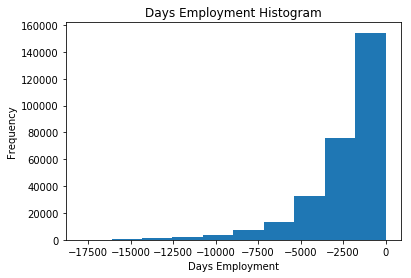

In [0]:
#Checking the distribution of days of employment
train_test_merged['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [0]:
# data is skewed, replacing the nulls with the median
train_test_merged['DAYS_EMPLOYED']=train_test_merged['DAYS_EMPLOYED'].fillna(train_test_merged['DAYS_EMPLOYED'].median())

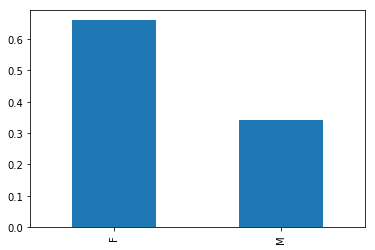

In [0]:
# Checking impact of gender on target variable
((train_test_merged[train_test_merged['CODE_GENDER']!='XNA']['CODE_GENDER'].value_counts())/len(train_test_merged)).plot(kind='bar')

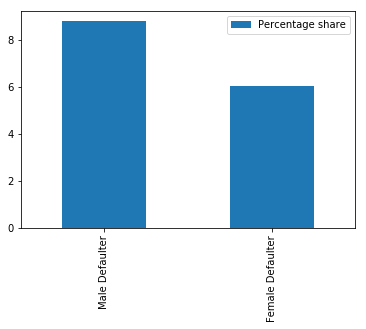

In [0]:
# Male tends to default more
lst=[]

lst.append(len(train_test_merged[(train_test_merged['CODE_GENDER']=='M') & (train_test_merged['TARGET']==1)])*1.0/(len(train_test_merged[train_test_merged['CODE_GENDER']=='M'])))
lst.append(len(train_test_merged[(train_test_merged['CODE_GENDER']=='F') & (train_test_merged['TARGET']==1)])*1.0/(len(train_test_merged[train_test_merged['CODE_GENDER']=='F'])))

names=['Male Defaulter','Female Defaulter']

gender_default=pd.DataFrame(lst,names)
gender_default=gender_default*100
gender_default.columns=['Percentage share']
gender_default.plot(kind='bar')

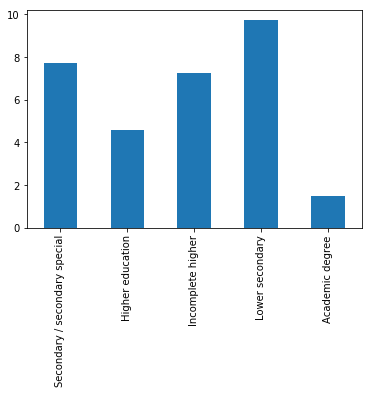

In [0]:
# Checking the impact of education level on target variable - education seems to be inversely proportional to loan default

((train_test_merged[train_test_merged['TARGET']==1]['NAME_EDUCATION_TYPE'].value_counts())*100/(train_test_merged['NAME_EDUCATION_TYPE'].value_counts())).plot(kind='bar')

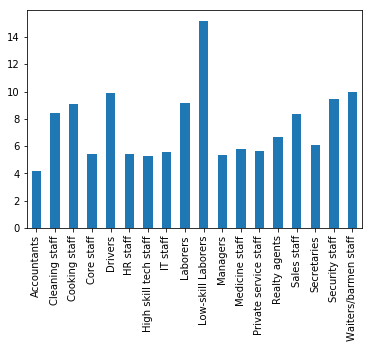

In [0]:
# Low skilled employees tend to do more default

((train_test_merged[train_test_merged['TARGET']==1]['OCCUPATION_TYPE'].value_counts())*100/(train_test_merged['OCCUPATION_TYPE'].value_counts())).plot(kind='bar')

In [0]:
#Checking the distribution of other variables in the dataset
train_test_merged.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    306972
1.0      1648
2.0        57
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [0]:
train_test_merged.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    307128
1.0      1355
2.0       113
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [0]:
train_test_merged.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     264574
1.0      33471
2.0       5409
3.0       1995
4.0       1077
5.0        603
6.0        344
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [0]:
train_test_merged.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    300035
1.0      8321
2.0       202
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [0]:
train_test_merged.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      238976
1.0       49435
2.0       17410
3.0        2212
4.0         533
5.0          75
6.0          29
7.0           8
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [0]:
train_test_merged.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     82640
1.0     72616
2.0     58681
3.0     39822
4.0     24459
5.0     14128
6.0      8094
7.0      4422
8.0      2424
9.0      1218
10.0       43
11.0       43
12.0       35
13.0       21
14.0       11
17.0        8
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [0]:
# Except the year, 0 looks the most common value in all other Credit Bureau enquiry fields
train_test_merged.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0, inplace=True)
train_test_merged.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0, inplace=True)
train_test_merged.AMT_REQ_CREDIT_BUREAU_MON.fillna(0, inplace=True)
train_test_merged.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0, inplace=True)
train_test_merged.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0, inplace=True)

In [0]:
# Let's explore EXT_SOURCE_3 
train_test_merged['EXT_SOURCE_3'].value_counts().head(15)

0.746300    1660
0.713631    1510
0.694093    1459
0.670652    1388
0.581484    1335
0.595456    1333
0.652897    1331
0.554947    1319
0.689479    1303
0.621226    1270
0.626304    1247
0.450747    1246
0.657784    1245
0.607557    1230
0.706205    1211
Name: EXT_SOURCE_3, dtype: int64

In [0]:
train_test_merged['EXT_SOURCE_3'].describe()

count    286622.000000
mean          0.509350
std           0.194141
min           0.000527
25%           0.368969
50%           0.533482
75%           0.665855
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [0]:
train_test_merged.EXT_SOURCE_3.corr(train_test_merged.EXT_SOURCE_2)

0.10848036379191903

In [0]:
# weak correlation with other external sources (EXT_SOURCE_1 and EXT_SOURCE_2)
train_test_merged.EXT_SOURCE_3.corr(train_test_merged.EXT_SOURCE_1)

0.18139022335926558

In [0]:
# couldn't find any specific pattern, replacing with median
train_test_merged.EXT_SOURCE_3.fillna(train_test_merged.EXT_SOURCE_3.median(),inplace = True)

In [0]:
# Occupation Type
train_test_merged.OCCUPATION_TYPE.value_counts()

Laborers                 63841
Sales staff              37174
Core staff               31931
Managers                 24945
Drivers                  21376
High skill tech staff    13234
Accountants              11441
Medicine staff            9853
Security staff            7636
Cooking staff             6840
Cleaning staff            5309
Private service staff     3107
Low-skill Laborers        2365
Waiters/barmen staff      1526
Secretaries               1518
Realty agents              889
HR staff                   667
IT staff                   607
Name: OCCUPATION_TYPE, dtype: int64

In [0]:
# checking if salary is a good indicator for OCCUPATION_TYPE - all the salaries are very close, can't get any inference out of it
train_test_merged.groupby(train_test_merged.OCCUPATION_TYPE).describe()['AMT_INCOME_TOTAL']

,count,mean,std,min,25%,50%,75%,max
OCCUPATION_TYPE,,,,,,,,
Accountants,11441.0,196376.927760,108430.582209,27000.0,135000.0,180000.0,225000.000,2214117.0
Cleaning staff,5309.0,132455.091919,64902.601810,25650.0,90000.0,117000.0,157500.000,1080000.0
Cooking staff,6840.0,140280.394388,64146.255699,27000.0,90000.0,135000.0,174223.125,675000.0
Core staff,31931.0,173919.965399,97610.266386,27000.0,112500.0,157500.0,207000.000,3600000.0
Drivers,21376.0,188228.164722,82374.903445,27000.0,135000.0,180000.0,225000.000,2475000.0
HR staff,667.0,194530.284108,148149.120727,30600.0,135000.0,162000.0,225000.000,3150000.0
High skill tech staff,13234.0,184175.735369,95489.610358,27000.0,117000.0,157500.0,225000.000,1890000.0
IT staff,607.0,212949.763591,139822.415570,45000.0,135000.0,180000.0,247500.000,2025000.0
Laborers,63841.0,167061.270487,469565.621547,27000.0,112500.0,157500.0,202500.000,117000000.0


Imputing the remaining missing values using sklearn's iterative_imputer package(inspired from R's MICE package)

In [0]:
# importing library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter = 10, random_state = 0)

In [0]:
# categorical columns
train_test_merged.columns[train_test_merged.dtypes.values == 'O']

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [0]:
imp.fit(train_test_merged.loc[:, ~train_test_merged.columns.isin(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'Label', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'TARGET','WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'])])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [0]:
imputation_result = pd.DataFrame(imp.transform(train_test_merged.loc[:, ~train_test_merged.columns.isin(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'Label', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'TARGET','WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'])]))

In [0]:
imputation_result.shape

(356255, 84)

In [0]:
imputation_result.columns = train_test_merged.loc[:, ~train_test_merged.columns.isin(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'Label', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'TARGET','WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'])].columns

In [0]:
imputation_result.head(2)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,...,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TOTALAREA_MODE,Train_YN,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0,1.0,-9461.0,-637.0,-2120.0,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0833,0.0833,0.0833,10.0,0.0,0.0,0.0190,0.0193,0.0198,0.0000,0.00,0.0,2.0,2.0,0.018801,2.0,2.0,0.0,0.0,0.0,0.0,100002.0,0.0149,1.0,0.9722,0.9722,0.9722
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0,2.0,-16765.0,-1188.0,-291.0,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0.0345,0.0345,0.0345,0.311267,0.622246,0.533482,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.2917,0.2917,0.2917,11.0,0.0,0.0,0.0549,0.0558,0.0554,0.0098,0.01,0.0,1.0,1.0,0.003541,1.0,1.0,0.0,0.0,0.0,0.0,100003.0,0.0714,1.0,0.9851,0.9851,0.9851


In [0]:
train_test_merged.loc[:, ~train_test_merged.columns.isin(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'Label', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'TARGET','WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START'])] = imputation_result.copy()

In [0]:
# we have 5 categorical features with null values
train_test_merged.isnull().sum().sort_values(ascending = False).iloc[:6]

WALLSMATERIAL_MODE              180234
HOUSETYPE_MODE                  177916
EMERGENCYSTATE_MODE             167964
OCCUPATION_TYPE                 111996
NAME_TYPE_SUITE                   2203
YEARS_BEGINEXPLUATATION_MODE         0
dtype: int64

Let's impute the remaining values

In [0]:
train_test_merged['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

In [0]:
train_test_merged.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace=True)

In [0]:
train_test_merged['HOUSETYPE_MODE'].value_counts()

block of flats      175162
specific housing      1761
terraced house        1416
Name: HOUSETYPE_MODE, dtype: int64

In [0]:
train_test_merged.HOUSETYPE_MODE.fillna('block of flats', inplace=True)

In [0]:
train_test_merged['EMERGENCYSTATE_MODE'].value_counts()

No     185607
Yes      2684
Name: EMERGENCYSTATE_MODE, dtype: int64

In [0]:
train_test_merged.EMERGENCYSTATE_MODE.fillna('EMERGENCYSTATE_MODE', inplace=True)

In [0]:
train_test_merged['WALLSMATERIAL_MODE'].value_counts()

Panel           77309
Stone, brick    75249
Block           10681
Wooden           6156
Mixed            2649
Monolithic       2068
Others           1909
Name: WALLSMATERIAL_MODE, dtype: int64

In [0]:
train_test_merged.WALLSMATERIAL_MODE.fillna('Panel', inplace=True)

In [0]:
train_test_merged['OCCUPATION_TYPE'].value_counts()

Laborers                 63841
Sales staff              37174
Core staff               31931
Managers                 24945
Drivers                  21376
High skill tech staff    13234
Accountants              11441
Medicine staff            9853
Security staff            7636
Cooking staff             6840
Cleaning staff            5309
Private service staff     3107
Low-skill Laborers        2365
Waiters/barmen staff      1526
Secretaries               1518
Realty agents              889
HR staff                   667
IT staff                   607
Name: OCCUPATION_TYPE, dtype: int64

In [0]:
train_test_merged.OCCUPATION_TYPE.fillna('Laborers', inplace=True)

In [0]:
# no more nulls
train_test_merged.isnull().any().sum()

0

**Feature Engineering**

In [0]:
#Changing the days value to positive
train_test_merged['DAYS_EMPLOYED']=abs(train_test_merged['DAYS_EMPLOYED'])
train_test_merged['DAYS_BIRTH']=abs(train_test_merged['DAYS_BIRTH'])

#Converting days to years
train_test_merged['YEARS_EMPLOYED']=train_test_merged['DAYS_EMPLOYED']*1.0/365
train_test_merged['YEARS_BIRTH']=train_test_merged['DAYS_BIRTH']*1.0/365

In [0]:
# train_test_merged[train_test_merged['Label'] == 'Train'].corr()['TARGET']

In [0]:
# Find correlations with the target and sort
# abs(train_test_merged.corr()['TARGET']).sort_values(ascending = False)[:10]

In [0]:
# Bucketing Family size
train_test_merged['CNT_FAM_MEMBERS'].value_counts()

2.000000     184411
1.000000      78098
3.000000      60774
4.000000      28387
5.000000       3990
6.000000        451
7.000000         93
8.000000         22
9.000000          7
10.000000         6
13.000000         3
20.000000         2
16.000000         2
12.000000         2
14.000000         2
15.000000         1
1.738185          1
21.000000         1
11.000000         1
1.591184          1
Name: CNT_FAM_MEMBERS, dtype: int64

In [0]:
bins = pd.IntervalIndex.from_tuples([(0,1), (1,2), (2,4), (4,22)])
train_test_merged['FAMILY SIZE'] = pd.cut(train_test_merged['CNT_FAM_MEMBERS'],bins)
train_test_merged['FAMILY SIZE']=train_test_merged['FAMILY SIZE'].astype('str')

In [0]:
train_test_merged['FAMILY SIZE']=train_test_merged['FAMILY SIZE'].replace('(1, 2]','Small')
train_test_merged['FAMILY SIZE']=train_test_merged['FAMILY SIZE'].replace('(0, 1]','Single')
train_test_merged['FAMILY SIZE']=train_test_merged['FAMILY SIZE'].replace('(2, 4]','Normal')
train_test_merged['FAMILY SIZE']=train_test_merged['FAMILY SIZE'].replace('(4, 22]','Big')

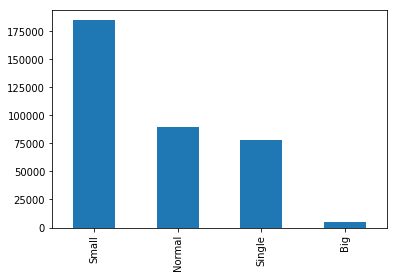

In [0]:
train_test_merged['FAMILY SIZE'].value_counts().plot(kind='bar')

In [0]:
# bucketing children count
train_test_merged['CNT_CHILDREN'].value_counts()

0.0     250056
1.0      70623
2.0      30698
3.0       4252
4.0        478
5.0         96
6.0         24
7.0          8
8.0          5
11.0         3
14.0         3
12.0         2
10.0         2
19.0         2
9.0          2
20.0         1
Name: CNT_CHILDREN, dtype: int64

In [0]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0,20)])
train_test_merged['IS_CHILDREN'] = pd.cut(train_test_merged['CNT_CHILDREN'],bins)
train_test_merged['IS_CHILDREN']=train_test_merged['IS_CHILDREN'].astype('str')

In [0]:
train_test_merged['IS_CHILDREN']=train_test_merged['IS_CHILDREN'].replace('(-1, 0]','0')
train_test_merged['IS_CHILDREN']=train_test_merged['IS_CHILDREN'].replace('(0, 20]','1')

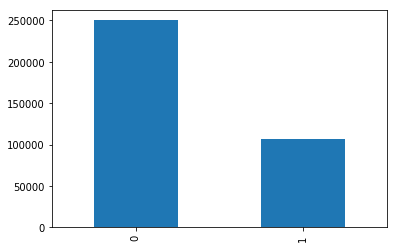

In [0]:
train_test_merged['IS_CHILDREN'].value_counts().plot(kind='bar')

In [0]:
# credit income ratio
train_test_merged['credit_income_ratio'] = train_test_merged['AMT_CREDIT'] / train_test_merged['AMT_INCOME_TOTAL']

In [0]:
# annuity income ratio
train_test_merged['annuity_income_ratio'] = train_test_merged['AMT_ANNUITY'] / train_test_merged['AMT_INCOME_TOTAL']

In [0]:
test.shape

(48744, 123)

Split train and test back

In [0]:
train_test_merged[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]=train_test_merged[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].astype('object')

In [0]:
train_test_merged.shape

(356255, 106)

In [0]:
train_test_merged_dummy = pd.get_dummies(train_test_merged)

In [0]:
train_test_merged_dummy.shape, train_test_merged.shape

((356255, 237), (356255, 106))

In [0]:
# Feature names
features = list(train_test_merged_dummy.columns)

In [0]:
train_test_merged_dummy['TARGET'].value_counts()

 0      282686
-999     48744
 1       24825
Name: TARGET, dtype: int64

In [0]:
train_test_merged['TARGET'].value_counts()

 0      282686
-999     48744
 1       24825
Name: TARGET, dtype: int64

In [0]:
# # Scale each feature to 0-1

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))

# scaler.fit(train_test_merged_dummy)
# train_test_merged_dummy = pd.DataFrame(scaler.transform(train_test_merged_dummy))

# train_test_merged_dummy.columns = features
# train_test_merged_dummy.head()

In [0]:
train_test_merged_dummy['Train_YN'] = train_test_merged['Train_YN'].copy()
train_test_merged_dummy['TARGET'] = train_test_merged['TARGET'].copy()
train_test_merged_dummy['TARGET'].value_counts()

 0      282686
-999     48744
 1       24825
Name: TARGET, dtype: int64

In [0]:
train = train_test_merged_dummy[train_test_merged_dummy['Train_YN'] == 1.0].copy()
test = train_test_merged_dummy[train_test_merged_dummy['Train_YN'] == 0.0].copy()

In [0]:
test.shape, train.shape

((48744, 237), (307511, 237))

In [0]:
test['TARGET'].value_counts()

-999    48744
Name: TARGET, dtype: int64

In [0]:
test.drop(columns = ['TARGET','Train_YN'], inplace = True)
train.drop(columns = ['Train_YN'], inplace = True)

In [0]:
train.shape, test.shape

((307511, 236), (48744, 235))

**##** "train" and "test" are our processed and cleaned data

In [0]:
# y will be target variable
y = train['TARGET'].copy()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [0]:
# removing target variable from train, we already have separate target variable field in the above step. Also SK_ID_CURR is just serial number so removing them
train.drop(columns = ['TARGET'], inplace = True)
train.shape, test.shape

((307511, 235), (48744, 235))

**Treating Data Imbalance - Oversampling using SMOTE**

In [0]:
# SMOTENC incorporate categorical variables as well but is slower
# from imblearn.over_sampling import SMOTENC
# categ_column_loc = [train.columns.get_loc(c) for c in train.columns if c in train.columns[train.dtypes.values == 'O']]
# sm = SMOTENC(categorical_features = categ_column_loc , random_state = 0)

# train_resample, y_resample = sm.fit_resample(train, y)

# y_resample = pd.Series(y_resample)
# train.shape, y.shape, train_resample.shape, y_resample.shape

In [0]:
## SMOTE - faster but need to encode categorical data
from imblearn.over_sampling import SMOTE
train_resample, y_resample = SMOTE().fit_resample(train,y)

y_resample = pd.Series(y_resample)
train_resample = pd.DataFrame(train_resample)
train.shape, y.shape, train_resample.shape, y_resample.shape

In [0]:
train_resample.columns = train.columns

In [0]:
train_resample.head()

In [0]:
y_resample.value_counts()

We will use the resampling output for model building

**Model Building - 2.1 RandomForest without Resampling**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Initialize
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1) #n_jobs = -1 meaning utilize all system resources

In [0]:
# Fit the model
rf_model = random_forest.fit(train, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


In [0]:
# Make predictions on the test data
pred_rf = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [0]:
final_RF_pred = pd.DataFrame(pred_rf)
#final_RF_pred.to_csv('rf_pred.csv')

In [0]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:20]

,importance
EXT_SOURCE_2,0.037767
EXT_SOURCE_3,0.037199
EXT_SOURCE_1,0.029437
DAYS_ID_PUBLISH,0.022429
DAYS_BIRTH,0.021891
DAYS_REGISTRATION,0.021734
YEARS_BIRTH,0.021606
SK_ID_CURR,0.021249
annuity_income_ratio,0.021149
credit_income_ratio,0.020210


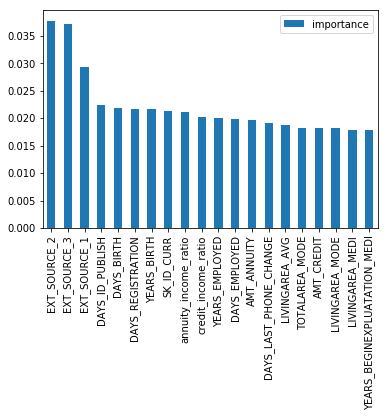

In [0]:
feature_importances[:20].plot(kind='bar')

*Test AUC - 0.698*

**Model Building - 2.2 RandomForest with SMOTE**

In [0]:
rf_model_resample = random_forest.fit(train_resample, y_resample)
pred_rf_resample = random_forest.predict_proba(test)[:, 1]
final_RF_pred_resample = pd.DataFrame(pred_rf_resample)
final_RF_pred_resample.to_csv('rf_pred_resample.csv')

*Test AUC - 0.691*

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

log_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',C=0.1).fit(train_scaled, y)
pred_log = log_model.predict_proba(test_scaled)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
log_model.coef_

array([[ 5.97369141e-01,  5.87590129e-01, -9.72336827e-01,
         3.81754246e-02,  5.08169155e-02, -4.32882659e-02,
        -3.44969167e-01, -8.96825635e-02, -2.22713429e-01,
         9.12853364e-02,  2.60724348e-02,  1.67780737e-02,
         3.15675897e-02,  2.92410696e-02,  2.89014666e-02,
         2.12843377e-01, -2.64910734e-01,  1.60233537e-01,
         1.26317257e-01,  1.11341191e-01,  7.24579016e-01,
         7.49346455e-01, -2.45879302e-02, -3.14359660e-02,
         3.41806052e-02, -5.17743003e-02, -7.42339814e-02,
        -7.75546315e-02, -9.76322978e-01, -8.15728640e-01,
        -1.17017256e+00, -1.09656945e-01, -1.99017675e-02,
        -6.96932294e-02, -9.92765192e-04, -4.19792054e-01,
        -3.13204236e-01, -2.89203104e-01, -1.81926133e-01,
        -1.07009948e-01, -1.94837225e-01, -7.28157172e-02,
         1.35040318e-01,  5.22517654e-02,  4.95775139e-02,
         1.55525984e-01, -3.34161417e-02,  1.26432832e-01,
         1.23545252e-01,  7.19617867e-03,  5.40557966e-0

In [0]:
train.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'FAMILY SIZE_Big',
       'FAMILY SIZE_Normal', 'FAMILY SIZE_Single', 'FAMILY SIZE_Small',
       'IS_CHILDREN_0', 'IS_CHILDREN_1'],
      dtype='object', length=235)

In [0]:
log_model_features=pd.DataFrame(log_model.coef_[0])
log_model_features.index=train.columns

In [0]:
log_model_features.columns=['Importance Score']
log_model_features.sort_values(by='Importance Score',ascending=False)[:20]

,Importance Score
DEF_60_CNT_SOCIAL_CIRCLE,0.749346
DEF_30_CNT_SOCIAL_CIRCLE,0.724579
annuity_income_ratio,0.682913
AMT_ANNUITY,0.597369
AMT_CREDIT,0.587590
ORGANIZATION_TYPE_Realtor,0.353486
credit_income_ratio,0.275231
ORGANIZATION_TYPE_Legal Services,0.246542
NAME_INCOME_TYPE_Unemployed,0.245580
DAYS_BIRTH,0.212843


**Model Building - 3.1. XGBoost without resampling**

Without tuning

In [0]:
import xgboost as xgb

In [0]:
params = {
   
    'max_depth': 7, # to control over-fitting, optimal value range: 3-10
    'gamma' :0, # the minimum loss reduction required to make a split, XGB will build the tree first then prune in case of 0 gamma
    'eta':.05, # shrinkage factor, optimal value range: 0.01-0.2
    'subsample': 0.7, # fraction of observations to be randomly samples for each tree, optimal value range: 0.5-1
    'colsample_bytree': 0.7, # fraction of columns to be randomly samples for each tree, optimal value range: 0.5-1
    'scale_pos_weight' : 1.0, # for imbalanced data
    'objective':'binary:logistic', # loss function to be minimized
    'eval_metric':'auc', # metric to be used for validation data
    'silent': 0 # running messages will be printed
}

In [0]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=500, # number of boosting rounds or trees to build
                    early_stopping_rounds=10, # stop if performance haven’t improved for N rounds
                    evals=[(matrix_test,'test')]
                   )
    return model

In [0]:
from sklearn.model_selection import train_test_split
xgb_train, xgb_val, xgb_y_train, xgb_y_val = train_test_split(train, y, test_size = 0.2, random_state = 42)

In [0]:
xgb_model = XGBmodel(xgb_train,xgb_val,xgb_y_train,xgb_y_val,params)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	test-auc:0.696488
Will train until test-auc hasn't improved in 10 rounds.
[1]	test-auc:0.70274
[2]	test-auc:0.720351
[3]	test-auc:0.723046
[4]	test-auc:0.723631
[5]	test-auc:0.72946
[6]	test-auc:0.73049
[7]	test-auc:0.734369
[8]	test-auc:0.735992
[9]	test-auc:0.736834
[10]	test-auc:0.73723
[11]	test-auc:0.737472
[12]	test-auc:0.737386
[13]	test-auc:0.737108
[14]	test-auc:0.736883
[15]	test-auc:0.738056
[16]	test-auc:0.7382
[17]	test-auc:0.738104
[18]	test-auc:0.73818
[19]	test-auc:0.738663
[20]	test-auc:0.73874
[21]	test-auc:0.738838
[22]	test-auc:0.739007
[23]	test-auc:0.739184
[24]	test-auc:0.73939
[25]	test-auc:0.739376
[26]	test-auc:0.739789
[27]	test-auc:0.740292
[28]	test-auc:0.740392
[29]	test-auc:0.740368
[30]	test-auc:0.74072
[31]	test-auc:0.740918
[32]	test-auc:0.741713
[33]	test-auc:0.742016
[34]	test-auc:0.742262
[35]	test-auc:0.742481
[36]	test-auc:0.742522
[37]	test-auc:0.743251
[38]	test-auc:0.743267
[39]	test-auc:0.743329
[40]	test-auc:0.743263
[41]	test-auc:0.74337

In [0]:
xgb_features=pd.DataFrame(xgb_model.get_score(importance_type='gain'), index=[0])
xgb_features

,EXT_SOURCE_2,EXT_SOURCE_1,REG_CITY_NOT_LIVE_CITY,AMT_INCOME_TOTAL,LIVINGAREA_MEDI,APARTMENTS_MODE,TOTALAREA_MODE,LIVINGAREA_AVG,DAYS_BIRTH,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,NAME_CONTRACT_TYPE_Cash loans,DAYS_LAST_PHONE_CHANGE,annuity_income_ratio,ORGANIZATION_TYPE_Government,NAME_EDUCATION_TYPE_Higher education,AMT_CREDIT,AMT_GOODS_PRICE,ORGANIZATION_TYPE_Services,AMT_REQ_CREDIT_BUREAU_MON,CODE_GENDER_F,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE_Business Entity Type 2,REGION_RATING_CLIENT_3.0,ELEVATORS_MEDI,NAME_FAMILY_STATUS_Separated,YEARS_BEGINEXPLUATATION_AVG,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR_Y,ORGANIZATION_TYPE_School,REGION_POPULATION_RELATIVE,CNT_CHILDREN,NAME_HOUSING_TYPE_Municipal apartment,SK_ID_CURR,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Construction,DEF_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_IT staff,FLAG_DOCUMENT_3,REGION_RATING_CLIENT_W_CITY_3.0,...,FLAG_DOCUMENT_6,NAME_INCOME_TYPE_State servant,EMERGENCYSTATE_MODE_EMERGENCYSTATE_MODE,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,IS_CHILDREN_1,LIVE_CITY_NOT_WORK_CITY,WALLSMATERIAL_MODE_Mixed,ORGANIZATION_TYPE_Security Ministries,REG_REGION_NOT_LIVE_REGION,NAME_HOUSING_TYPE_Office apartment,ORGANIZATION_TYPE_Military,IS_CHILDREN_0,ORGANIZATION_TYPE_Culture,"WALLSMATERIAL_MODE_Stone, brick",ORGANIZATION_TYPE_Insurance,FAMILY SIZE_Single,FLAG_DOCUMENT_9,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_XNA,OCCUPATION_TYPE_Medicine staff,ORGANIZATION_TYPE_Legal Services,EMERGENCYSTATE_MODE_Yes,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Medicine,OCCUPATION_TYPE_HR staff,NAME_INCOME_TYPE_Unemployed,ORGANIZATION_TYPE_Housing,NAME_INCOME_TYPE_Pensioner,ORGANIZATION_TYPE_Industry: type 12,FLAG_DOCUMENT_15,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Trade: type 1,FLAG_DOCUMENT_14,FAMILY SIZE_Big,NAME_EDUCATION_TYPE_Academic degree
0,33.349167,18.670559,8.120631,6.697189,7.079826,7.178056,7.035002,8.082607,8.975064,7.193122,7.314735,12.134093,7.683077,7.708772,6.435409,18.133068,10.579621,12.472697,4.908165,5.546441,13.933801,6.769878,5.97751,10.956816,7.337942,7.695884,7.168713,11.173938,13.816647,6.442523,6.797333,6.147737,5.492866,6.550636,4.418527,7.938052,8.593377,1.080872,13.680862,11.579391,...,7.751254,10.555354,6.365129,6.26427,5.543161,3.600441,6.399611,6.377419,7.715542,8.705201,7.819377,11.407143,6.42772,4.91375,5.283753,7.347967,6.659025,11.646027,2.210052,11.548887,6.237159,9.840857,6.067415,6.168071,9.32551,6.068822,6.437943,8.369655,8.796899,6.023978,8.140802,8.466639,11.480892,7.819219,6.242073,7.44519,7.21301,7.624945,11.408336,6.803688


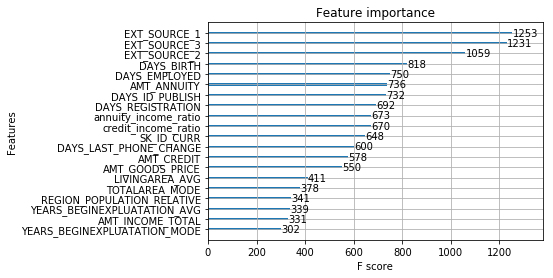

In [0]:
xgb.plot_importance(xgb_model, max_num_features=20)

**XGBoost Hyperparameter Tuning**

In [0]:
# cv_results = xgb.cv(
#                     params=params,
#                     dtrain=xgb.DMatrix(xgb_train,label=xgb_y_train),
#                     num_boost_round=5000,
#                     early_stopping_rounds=10,
#                     seed=42,
#                     nfold=5,
#                     metrics = 'auc'
#                     )    
# cv_results # returns a table where the rows correspond to the number of boosting trees used

In [0]:
# cv_results['test-auc-mean'].max()

In [0]:
# We will first tune our parameters to maximize the test AUC in cross-validation
# then we will check the performance of our model on the validation set

In [0]:
# Let's start tuning the parameters subsample and colsample_bytree

In [0]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,9)]
    for colsample in [i/10. for i in range(6,9)]
]

In [0]:
# Define initial best params and MAE
max_auc = 0
best_params = None

# Start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    
    # Update parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
                        params=params,
                        dtrain=xgb.DMatrix(xgb_train,label=xgb_y_train),
                        num_boost_round=5000,
                        early_stopping_rounds=10,
                        seed=42,
                        nfold=5,
                        metrics = 'auc'
                        )
    
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

CV with subsample=0.8, colsample=0.8


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
params['subsample'] = 0.7 #best_params[0]
params['colsample_bytree'] = 0.7 #best_params[1]

In [0]:
# Tuning shrinkage factor

max_auc = 0
best_params = None

for eta in [.2, .1, .05, .01]:
    print("CV with eta={}".format(eta))
    
    # Update parameters
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
                        params=params,
                        dtrain=xgb.DMatrix(xgb_train,label=xgb_y_train),
                        num_boost_round=5000,
                        early_stopping_rounds=10,
                        seed=42,
                        nfold=5,
                        metrics = 'auc'
                        )
    
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

In [0]:
# final tuned parameters
params = {
   
    'max_depth': 7, # to control over-fitting, optimal value range: 3-10
    'gamma' :0, # the minimum loss reduction required to make a split, XGB will build the tree first then prune in case of 0 gamma
    'eta':.03, # shrinkage factor, optimal value range: 0.01-0.2
    'subsample': 0.8, # fraction of observations to be randomly samples for each tree, optimal value range: 0.5-1
    'colsample_bytree': 0.8, # fraction of columns to be randomly samples for each tree, optimal value range: 0.5-1
    'scale_pos_weight' : 11.0, # for imbalanced data
    'objective':'binary:logistic', # loss function to be minimized
    'eval_metric':'auc', # metric to be used for validation data
    'silent': 0 # running messages will be printed
}


In [0]:
# train final model using tuned parameters
xgb_model = XGBmodel(xgb_train,xgb_val,xgb_y_train,xgb_y_val,params)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	test-auc:0.71512
Will train until test-auc hasn't improved in 10 rounds.
[1]	test-auc:0.72364
[2]	test-auc:0.731121
[3]	test-auc:0.731369
[4]	test-auc:0.731221
[5]	test-auc:0.733251
[6]	test-auc:0.734827
[7]	test-auc:0.736995
[8]	test-auc:0.738025
[9]	test-auc:0.738286
[10]	test-auc:0.73856
[11]	test-auc:0.738612
[12]	test-auc:0.738741
[13]	test-auc:0.738935
[14]	test-auc:0.738733
[15]	test-auc:0.739676
[16]	test-auc:0.740165
[17]	test-auc:0.740416
[18]	test-auc:0.740384
[19]	test-auc:0.740349
[20]	test-auc:0.740596
[21]	test-auc:0.740811
[22]	test-auc:0.741109
[23]	test-auc:0.741148
[24]	test-auc:0.741358
[25]	test-auc:0.741624
[26]	test-auc:0.741776
[27]	test-auc:0.742012
[28]	test-auc:0.742177
[29]	test-auc:0.742454
[30]	test-auc:0.742519
[31]	test-auc:0.742757
[32]	test-auc:0.743169
[33]	test-auc:0.743286
[34]	test-auc:0.743299
[35]	test-auc:0.743626
[36]	test-auc:0.743815
[37]	test-auc:0.74427
[38]	test-auc:0.744425
[39]	test-auc:0.744696
[40]	test-auc:0.744808
[41]	test-auc:0

In [0]:
xgb_test = xgb.DMatrix(test)

In [0]:
pred_xgb = xgb_model.predict(xgb_test, ntree_limit = xgb_model.best_ntree_limit).tolist()
final_xgb_pred = pd.DataFrame(pred_xgb)

In [0]:
final_xgb_pred.to_csv('XGB.csv')

*Test AUC - 0.74*

**Model Building - 3.1. XGBoost with SMOTE resampling**

In [0]:
params['scale_pos_weight'] = 1

xgb_train_resample, xgb_val_resample, xgb_y_train_resample, xgb_y_val_resample = train_test_split(train_resample, y_resample, test_size = 0.2, random_state = 42)

xgb_model_resample = XGBmodel(xgb_train_resample,xgb_val_resample,xgb_y_train_resample,xgb_y_val_resample,params)

pred_xgb_resample = xgb_model_resample.predict(xgb_test, ntree_limit = xgb_model_resample.best_ntree_limit).tolist()
final_xgb_pred_resample = pd.DataFrame(pred_xgb_resample)

final_xgb_pred_resample.to_csv('XGB_resample.csv')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	test-auc:0.936419
Will train until test-auc hasn't improved in 10 rounds.
[1]	test-auc:0.954369
[2]	test-auc:0.957356
[3]	test-auc:0.958322
[4]	test-auc:0.958141
[5]	test-auc:0.958022
[6]	test-auc:0.958831
[7]	test-auc:0.961947
[8]	test-auc:0.965782
[9]	test-auc:0.966969
[10]	test-auc:0.967625
[11]	test-auc:0.96783
[12]	test-auc:0.968445
[13]	test-auc:0.96842
[14]	test-auc:0.968351
[15]	test-auc:0.968436
[16]	test-auc:0.968956
[17]	test-auc:0.968908
[18]	test-auc:0.969449
[19]	test-auc:0.969687
[20]	test-auc:0.969887
[21]	test-auc:0.970204
[22]	test-auc:0.970598
[23]	test-auc:0.97077
[24]	test-auc:0.971102
[25]	test-auc:0.971279
[26]	test-auc:0.971449
[27]	test-auc:0.971694
[28]	test-auc:0.971883
[29]	test-auc:0.972003
[30]	test-auc:0.97215
[31]	test-auc:0.972283
[32]	test-auc:0.972399
[33]	test-auc:0.972529
[34]	test-auc:0.972657
[35]	test-auc:0.972812
[36]	test-auc:0.972903
[37]	test-auc:0.972998
[38]	test-auc:0.973154
[39]	test-auc:0.973258
[40]	test-auc:0.973334
[41]	test-auc:0

*Test AUC - 0.746*

**Model Building - 4.1. LGBM without resampling**

In [0]:
import lightgbm as lgb

In [0]:
# lgbm_train = train
# lgbm_test = test

In [0]:
# lgbm_categ_column = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
#        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
#        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [0]:
lgbm_train,lgbm_val,lgbm_y_train,lgbm_y_val = train_test_split(train,y, test_size = 0.2, random_state = 42)

In [0]:
# taking data as LightGBM format
trn_data = lgb.Dataset(lgbm_train, label=lgbm_y_train)
val_data = lgb.Dataset(lgbm_val, label=lgbm_y_val)

In [0]:
lgbm_model = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : 8,
    "sub_sample":0.8,
    "num_leaves" : 31,
    "learning_rate" : 0.05,
    "seed": 42}

In [0]:
fit_lgbm = lgb.train(lgbm_model, trn_data, num_boost_round= 500, valid_sets = [trn_data, val_data], verbose_eval=500, 
                early_stopping_rounds = 100)

Training until validation scores don't improve for 100 rounds.
[500]	training's auc: 0.847107	valid_1's auc: 0.759631
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.847107	valid_1's auc: 0.759631


In [0]:
pred_lgbm = fit_lgbm.predict(test, num_iteration=fit_lgbm.best_iteration)

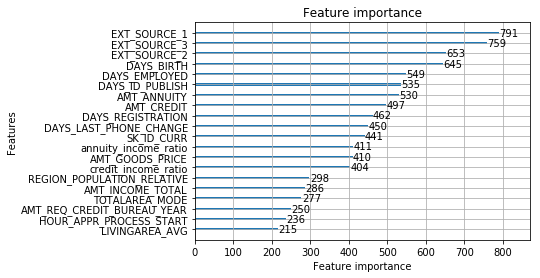

In [0]:
lgb.plot_importance(fit_lgbm,max_num_features=20)

In [0]:
final_lgbm_pred = pd.DataFrame(pred_lgbm)

In [0]:
final_lgbm_pred.to_csv('lgb.csv')

*Test AUC - 0.743*

**Model Building - 4.2. LGBM with SMOTE resampling**

In [0]:
lgbm_train_resample,lgbm_val_resample,lgbm_y_train_resample,lgbm_y_val_resample = train_test_split(train_resample, y_resample, test_size = 0.2, random_state = 42)

trn_data_resample = lgb.Dataset(lgbm_train_resample, label=lgbm_y_train_resample)
val_data_resample = lgb.Dataset(lgbm_val_resample, label=lgbm_y_val_resample)

fit_lgbm_resample = lgb.train(lgbm_model, trn_data_resample, num_boost_round= 500, valid_sets = [trn_data_resample, val_data_resample], verbose_eval=500, 
                early_stopping_rounds = 100)

pred_lgbm_resample = fit_lgbm_resample.predict(test, num_iteration=fit_lgbm_resample.best_iteration)
final_lgbm_pred_resample = pd.DataFrame(pred_lgbm_resample)
final_lgbm_pred_resample.to_csv('lgb_resample.csv')

Training until validation scores don't improve for 100 rounds.
[500]	training's auc: 0.98525	valid_1's auc: 0.978718
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.98525	valid_1's auc: 0.978718


*Test AUC - 0.75*

**Model Building - 5. CATBoost**

In [0]:
!pip install catboost

import catboost
from catboost import Pool, CatBoostClassifier,cv

     |████████████████████████████████| 61.7MB 456kB/s 


In [0]:
cat_train = train_test_merged[train_test_merged['Train_YN'] == 1].copy()
cat_test = train_test_merged[train_test_merged['Train_YN'] == 0].copy()

cat_test.drop(columns = ['TARGET','Train_YN'], inplace = True)
cat_train.drop(columns = ['Train_YN'], inplace = True)

cat_y = cat_train['TARGET'].copy()

cat_train.drop(columns = ['TARGET'], inplace = True)
cat_train.shape, cat_test.shape, cat_y.shape

((307511, 104), (48744, 104), (307511,))

In [0]:
# categorical columns

cat_train.columns[cat_train.dtypes.values == 'O']

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY SIZE',
       'IS_CHILDREN'],
      dtype='object')

In [0]:
categ_column = ['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY SIZE',
       'IS_CHILDREN']

In [0]:
x_train, x_val , y_train, y_val = train_test_split(cat_train,cat_y,test_size=0.20)

In [0]:
_train = Pool(x_train, label=y_train,cat_features= categ_column)
_valid = Pool(x_val, label=y_val,cat_features= categ_column)

In [0]:
model = CatBoostClassifier(subsample=0.6,
                           custom_loss='Logloss',
                           l2_leaf_reg = 10,
                           random_strength = 0,
                           max_depth=7,
                           eval_metric="AUC",
                           learning_rate=0.03,
                           iterations=60000,
                           bootstrap_type='Bernoulli',
                           task_type="GPU",
                           random_seed=42,
                           od_type="Iter")

fit_model = model.fit(_train,verbose_eval=1000, early_stopping_rounds=100,eval_set=[_valid],use_best_model=True,plot=False)

0:	learn: 0.7136440	test: 0.7083797	best: 0.7083797 (0)	total: 150ms	remaining: 2h 29m 44s
1000:	learn: 0.7890156	test: 0.7567133	best: 0.7567133 (1000)	total: 1m 56s	remaining: 1h 54m 21s
2000:	learn: 0.8144173	test: 0.7583712	best: 0.7583915 (1990)	total: 3m 53s	remaining: 1h 52m 55s
bestTest = 0.7584802806
bestIteration = 2186
Shrink model to first 2187 iterations.


In [0]:
# prediction
y_pred = fit_model.predict_proba(cat_test)

In [0]:
final_catboost_pred = pd.DataFrame(y_pred)
final_catboost_pred.head()

,0,1
0,0.942000,0.058000
1,0.843728,0.156272
2,0.980848,0.019152
3,0.962766,0.037234
4,0.870387,0.129613


In [0]:
final_catboost_pred.to_csv('catboost_pred.csv')

*Test AUC - 0.740*

**Model Building - 6. H20.ai Auto ML, let's benchmark**

In [0]:
# setting up the package

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
  
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 122.7MB 1.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/76/01/62/d6b7bfc9d599463401118db95eab37c134a6f24040828d31ab
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.3" 2019-04-16; OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1); OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvfanjvdd
  JVM stdout: /tmp/tmpvfanjvdd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvfanjvdd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_unknownUser_8iyqzp
H2O cluster total nodes:,1
H2O cluster free memory:,6.188 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [0]:
train_h2o = train.copy()

In [0]:
train_h2o['TARGET'] = y.copy()

In [0]:
#train_h2o['TARGET'] = train_h2o['TARGET']_toframe.asfactor()
train_h2o = h2o.H2OFrame(train_h2o)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
train_h2o['TARGET'] = train_h2o['TARGET'].asfactor()

In [0]:
h2o_automl = H2OAutoML(max_models = 2, max_runtime_secs=1500, seed = 1)


In [0]:
h2o_automl.train(y = 'TARGET', training_frame = train_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
h2o_leaderboard = h2o_automl.leaderboard
h2o_leaderboard.head()
h2o_leaderboard.head(rows=h2o_leaderboard.nrows) # Entire leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190731_063357,0.710324,0.263267,0.370636,0.266322,0.0709274


In [0]:
test_h2o = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
h20_prediction = h2o_automl.predict(test_h2o)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [0]:
h20_prediction.as_data_frame(use_pandas=True).to_csv('h20_pred.csv')

*Test AUC - 0.737*